# Spam detection (example, continued)

As in Week 3, we will use a data set from the paper

Almeida, T.A., Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

In [79]:
import numpy as np
import pandas as pd
df = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t", names=['s','t'])

As in Week 3, we count the number of uppercase letters in each text message.

In [80]:
import re
df['l'] = df['t'].str.len()
df['f'] = df.t.str.extract('([A-Z_]+)')
df['fl'] = df['f'].str.len()
df2 = df.t.str.extractall('([A-Z_]+)') # note that this is a data frame with hierarchical indexing

df['uc'] = df2.groupby(level=[0]).sum()
df['ucl'] = df['uc'].str.len()

df['ucr'] = df['ucl'].div(df['l'])

C:\Users\swmo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [81]:
df['sb'] = 1*(df['s'] == 'spam')

In [82]:
df.shape
df.isnull().sum() #isna() in some versions
df.loc[df.isnull().any(axis = 1)]
df.loc[df['ucr'].isnull(), 'ucr'] = 0 # we make the missing values zero in this case as they correspond to texts with no capital letters
df.loc[df['uc'].isnull(), 'uc'] = ''
df.loc[df['ucl'].isnull(), 'ucl'] = 0

In [83]:
df

,s,t,l,f,fl,uc,ucl,ucr,sb
0,ham,"Go until jurong point, crazy.. Available only ...",111,G,1.0,GAC,3.0,0.027027,0
1,ham,Ok lar... Joking wif u oni...,29,O,1.0,OJ,2.0,0.068966,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,F,1.0,FFACMTFATC,10.0,0.064516,1
3,ham,U dun say so early hor... U c already then say...,49,U,1.0,UU,2.0,0.040816,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,N,1.0,NI,2.0,0.032787,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,F,1.0,FMHITXX,7.0,0.047619,1
6,ham,Even my brother is not like to speak with me. ...,77,E,1.0,ET,2.0,0.025974,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,A,1.0,AMMOMNVCPC,10.0,0.062500,0
8,spam,WINNER!! As a valued network customer you have...,157,WINNER,6.0,WINNERATCKLV,12.0,0.076433,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,H,1.0,HURUFCTMUCFREE,14.0,0.090909,1


In [84]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import patsy
import numpy as np

y,X = patsy.dmatrices("sb ~ 1 + ucl", df)

lr = LogisticRegression().fit(X, np.ravel(y))
X.shape


(5572, 2)

In [85]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
lr.predict_proba(X)

array([[ 0.89445837,  0.10554163],
       [ 0.90047267,  0.09952733],
       [ 0.84283703,  0.15716297],
       ..., 
       [ 0.90047267,  0.09952733],
       [ 0.90047267,  0.09952733],
       [ 0.90047267,  0.09952733]])

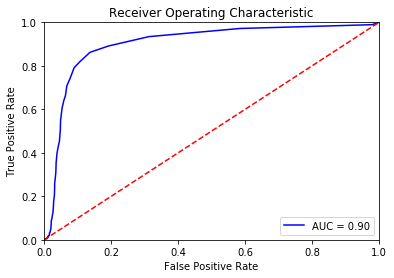

In [87]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(df['sb'], lr.predict_proba(X)[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

But are we actually cheating - are we overfitting the data? We can use data splitting to make sure that our findings generalize. To show this, let's fit a really flexible model. This uses the upper case string itself (not just its length).

In [91]:
y,X = patsy.dmatrices("sb ~ 1 + uc", df)

lr2 = LogisticRegression().fit(X, np.ravel(y))
X.shape

(5572, 2137)

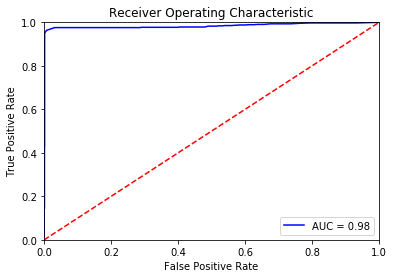

In [92]:
fpr, tpr, threshold = metrics.roc_curve(df['sb'], lr2.predict_proba(X)[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

A remedy is to use data splitting. We'll just use one simple split but more splits and averaging over the results is common.

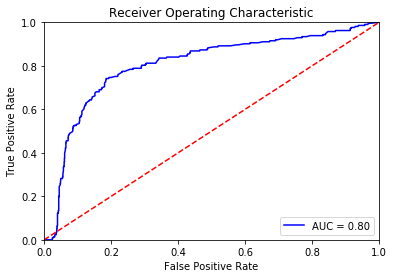

In [93]:
df['ts'] = df['t'].str.replace('\W', '') # for simplicity we keep only the letters of each text
df['ts'] = df['ts'].str.replace('\d+', '')

# we split data into a training set and a test set. The training is used for fitting a model, and this model is evaluated using the test set.
dfTrain = df.iloc[:4000,:]
dfTest = df.iloc[4000:,:]


y,X = patsy.dmatrices("sb ~ 1 + ucr", dfTrain)
lrUcr = LogisticRegression().fit(X, np.ravel(y))
yTest,Xtest = patsy.dmatrices("sb ~ 1 + ucr", dfTest)


fpr, tpr, threshold = metrics.roc_curve(dfTest['sb'], lrUcr.predict_proba(Xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Task 1

Compute FPR and TPR yourself for the thresholds in the vector 'threshold' above. Compare with the result from the metrics.roc_curve function.

### Task 2

Assume you use a random classifier (you just flip a (weighted) coin to decide the classification). What would the ROC look like? You can either implement this or give a theoretical argument.

We also try with a more flexible model, using counts of each combination (of length 1 or 2) of letters in the simplified texts. We see that the training AUC is 1.

In [94]:
fpr[199]

0.3428991905813098

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern = r"(?u)\b\w+\b", analyzer = 'char')

X = vectorizer.fit_transform(dfTrain['ts'])

feature_list = vectorizer.get_feature_names()

In [96]:
X.shape

(4000, 724)

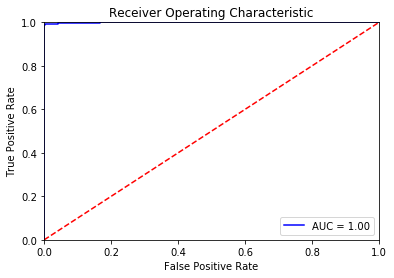

In [97]:
lrUc = LogisticRegression().fit(X, np.ravel(dfTrain['sb']))

fpr, tpr, threshold = metrics.roc_curve(dfTrain['sb'], lrUc.predict_proba(X)[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Using the test data, the AUC is lower.

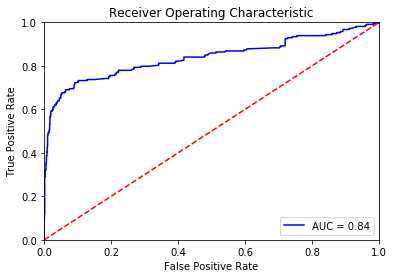

In [98]:
vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern = r"(?u)\b\w+\b", analyzer = 'char', vocabulary = feature_list)
Xtest = vectorizer.fit_transform(dfTest['uc'])

fpr, tpr, threshold = metrics.roc_curve(dfTest['sb'], lrUc.predict_proba(Xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Task 3

Evaluate your own feature(s) from Week 3 using the AUC and data splitting. 

In [73]:
#sum(np.logical_and(dfTest['sb'] == 0, lrUcr.predict_proba(Xtest)[:,1] > threshold[200]))/sum(dfTest['sb'] == 0)

0.3428991905813098

In [74]:
#fpr[199]

0.3428991905813098

In [75]:
#sum(np.logical_and(dfTest['sb'] == 1, lrUcr.predict_proba(Xtest)[:,1] > threshold[200]))/sum(dfTest['sb'] == 1)

0.83568075117370888

In [76]:
#tpr[199]

0.83568075117370888